In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
pd.set_option("display.max_columns",30)
pd.set_option("display.max_colwidth",None)
import warnings
warnings.filterwarnings("ignore")

In [309]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Smartphones_cleaned_dataset.csv")

# Data Info

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [311]:
df.shape

(980, 26)

In [312]:
df.head()


,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12,256,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6,128,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4,64,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6,128,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6,128,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


# Data Handling & Cleaning

In [313]:
df["num_front_cameras"].value_counts()

num_front_cameras
1.0    947
2.0     29
Name: count, dtype: int64

In [314]:
df.isna().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [316]:
df["extended_upto"].dtypes

dtype('float64')

In [317]:
df["rating"]=df["rating"].fillna(0.0)
df["processor_brand"]=df["processor_brand"].fillna("unknown")
df["num_cores"]=df["num_cores"].fillna(0.0)
df["processor_speed"]=df["processor_speed"].fillna(0.0)
df["battery_capacity"]=df["battery_capacity"].fillna(df["battery_capacity"].median())
df["fast_charging"]=df["fast_charging"].fillna(df["fast_charging"].median())
df["num_front_cameras"]=df["num_front_cameras"].fillna(df["num_front_cameras"].median())
df["os"]=df["os"].fillna("Unknown")
df["primary_camera_front"]=df["primary_camera_front"].fillna(df["primary_camera_front"].median())
df["extended_upto"]=df["extended_upto"].fillna(df["extended_upto"].median())

In [318]:
df["extended_upto"]=df["extended_upto"].astype("int")

In [319]:
df.drop(columns=["resolution_width","resolution_height"],inplace=True)

In [320]:
df.duplicated().sum()

np.int64(0)

# EDA & Visualization

In [322]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12,256,6.70,120,3,1.0,android,50.0,16.0,0,1024
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6,128,6.59,120,3,1.0,android,64.0,16.0,1,1024
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4,64,6.60,90,3,1.0,android,50.0,13.0,1,1024
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6,128,6.55,120,3,1.0,android,50.0,16.0,1,1024
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6,128,6.70,120,3,1.0,android,108.0,16.0,0,1024


## Highest priced brands 

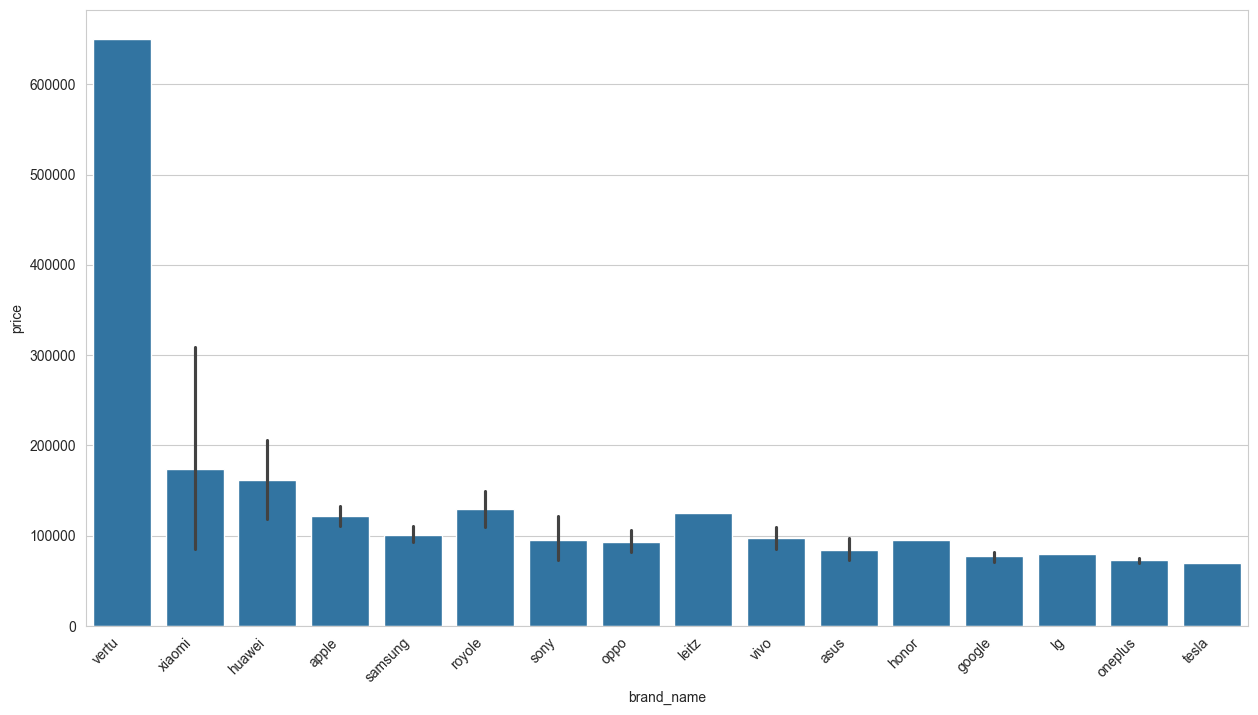

In [323]:
classifi_mo=df.groupby(["brand_name","model"])["price"].sum().sort_values(ascending=False).reset_index().head(100)
classifi_mo
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.barplot(data=classifi_mo,x="brand_name",y="price")
plt.xticks(rotation=45,ha="right")
plt.show()

## Processor Classification By Top 5 Brand

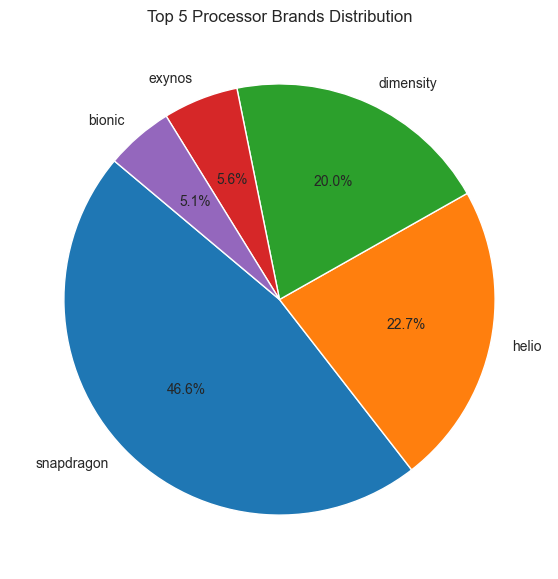

In [324]:
classifi_pro = df["processor_brand"].value_counts()  # Count occurrences

# Select top 5 brands
top_5 = classifi_pro.nlargest(5)

# Plot Pie Chart
plt.figure(figsize=(7,7))
plt.pie(top_5.values, labels=top_5.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 5 Processor Brands Distribution")
plt.show()


## 5g Availibility

<Axes: >

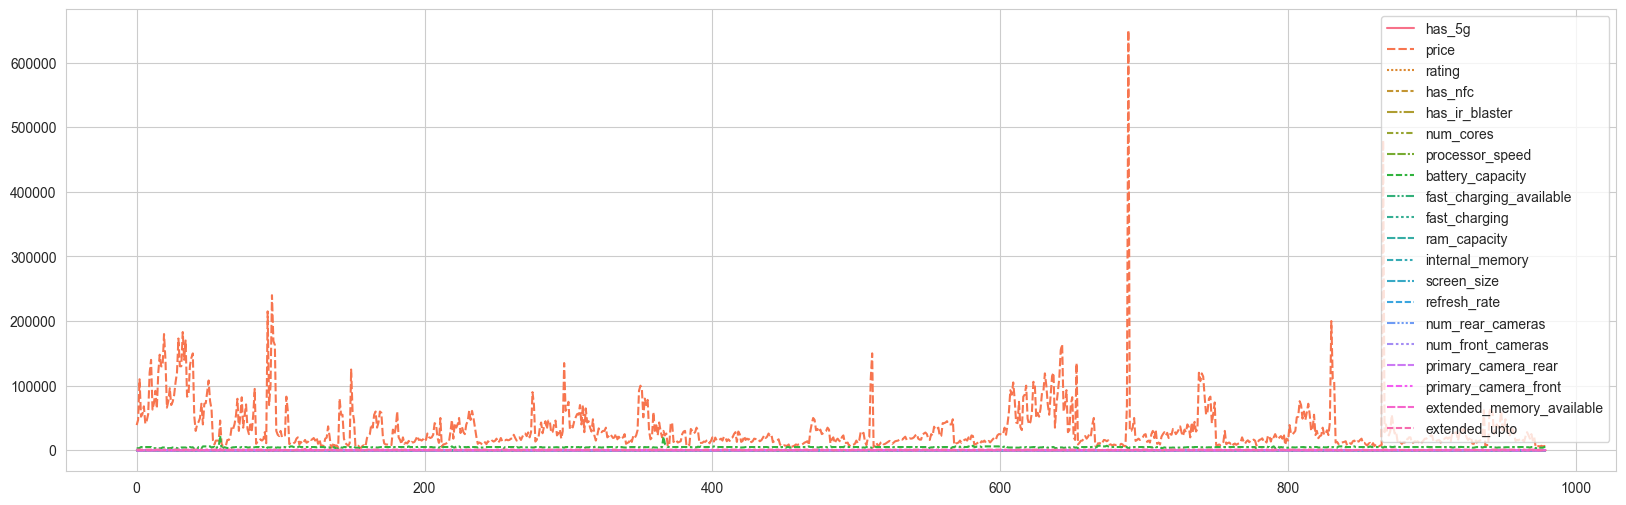

In [326]:
classifi_fg=df.groupby(["model","has_5g"]).sum().reset_index()
classifi_fg[["model","has_5g"]].head(50)
plt.figure(figsize=(20,6))
sns.lineplot(data=classifi_fg)

## Histogram Distribution

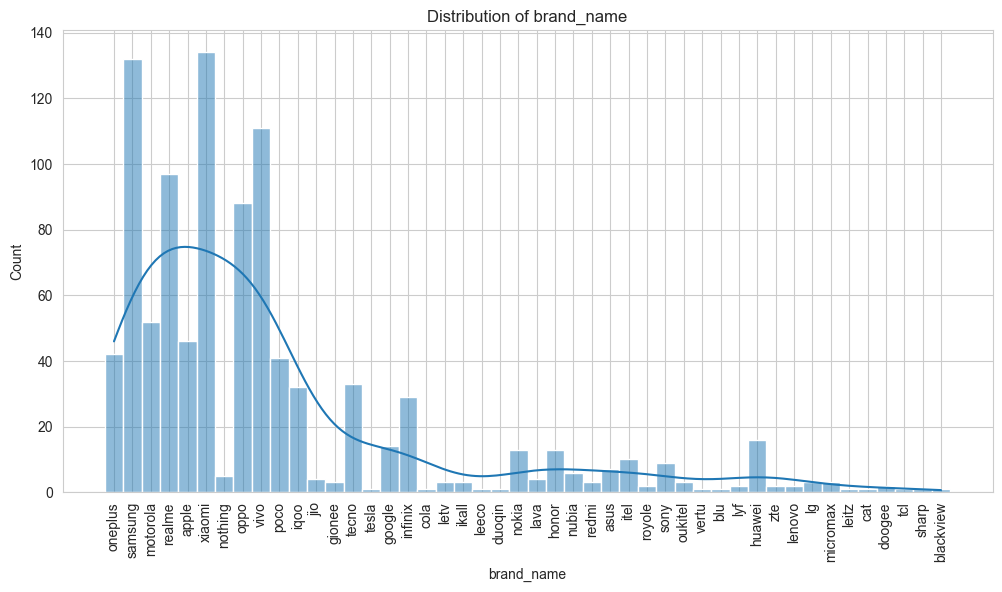

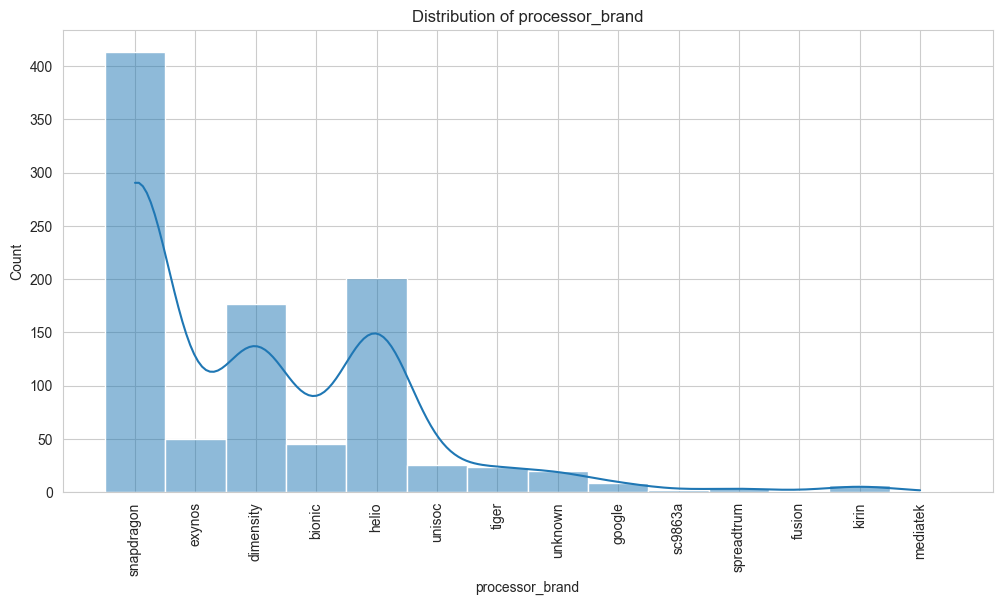

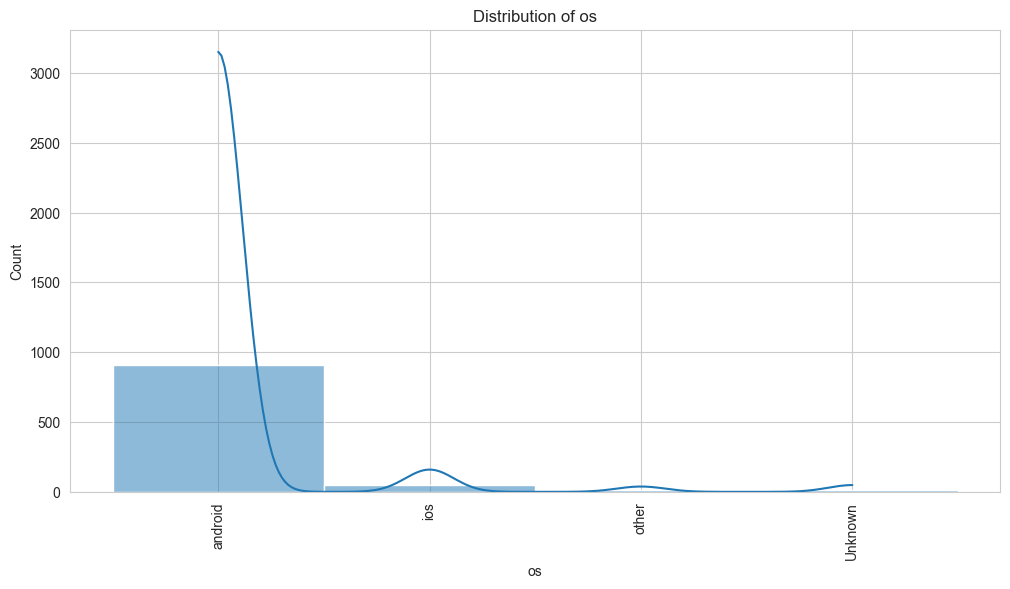

In [329]:
dis=df.drop(columns=["model"]).select_dtypes(include="object")
for colss in dis:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=colss,kde=True)
    plt.title(f"Distribution of {colss}")
    plt.xticks(rotation=90)
    plt.xlabel(colss)
    plt.ylabel("Count")
    plt.show()


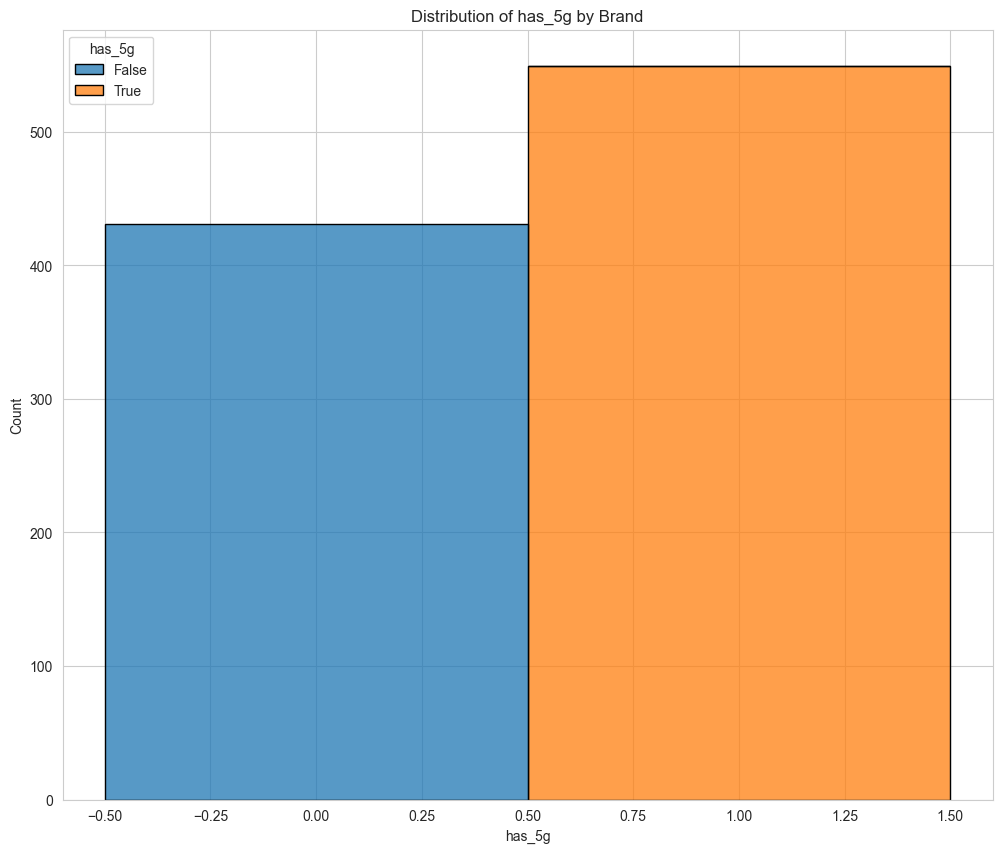

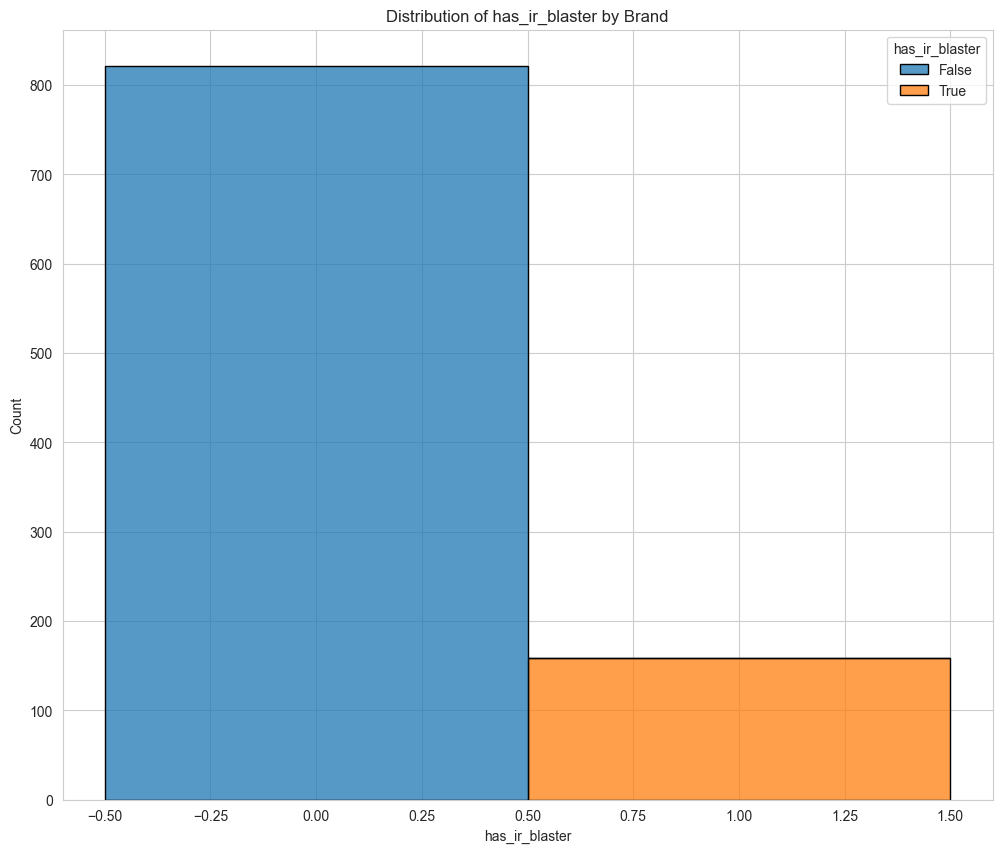

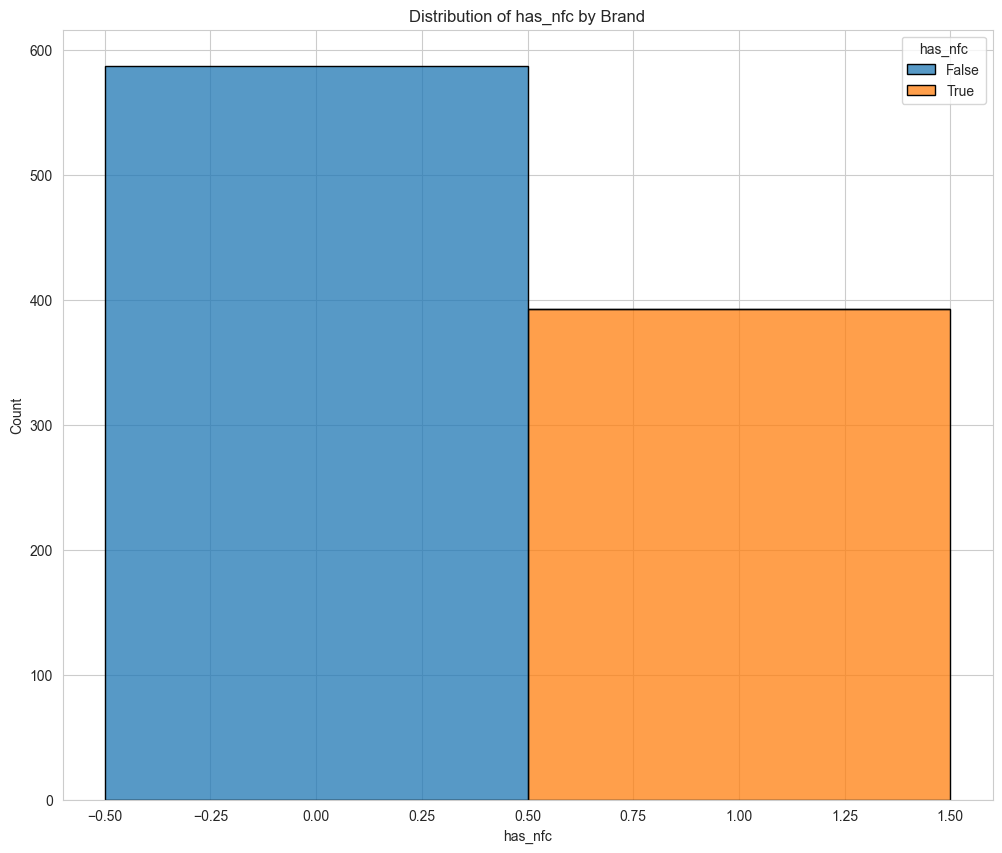

In [341]:
cols = ['has_5g', 'has_ir_blaster', 'has_nfc']

for col in cols:
    plt.figure(figsize=(12,10))
    sns.histplot(data=df, x=col,hue=col, multiple="stack", discrete=True,edgecolor="black")
    plt.title(f"Distribution of {col} by Brand")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


## Refresh Rate Classifictaion

In [331]:
df["refresh_rate"].value_counts()

refresh_rate
60     368
120    344
90     219
144     39
165      9
240      1
Name: count, dtype: int64

In [332]:
classifi_ref_240hz=df[df["refresh_rate"]==240]
classifi_ref_165hz=df[df["refresh_rate"]==165]
classifi_ref_144hz=df[df["refresh_rate"]==144]
classifi_ref_120hz=df[df["refresh_rate"]==120]


## 240 hz refresh rate supported phone

In [333]:
classifi_ref_240hz[["brand_name","model","refresh_rate"]]

,brand_name,model,refresh_rate
784,leitz,Leitz Phone 2,240


## 165 hz refresh rate supported phone

In [334]:
classifi_ref_165hz[["brand_name","model","refresh_rate"]]

,brand_name,model,refresh_rate
118,tesla,Tesla Pi Phone,165
182,motorola,Motorola Moto X40,165
278,asus,Asus ROG Phone 6 Pro 5G,165
406,asus,Asus ROG Phone 7,165
441,asus,Asus ROG Phone 6 Batman Edition,165
571,motorola,Motorola Edge 40 Pro 5G,165
633,asus,Asus ROG Phone 6,165
699,asus,Asus ROG Phone 6D Ultimate,165
924,nubia,Nubia Red Magic 6S 5G,165


## 144 hz refresh rate supported phone

In [335]:
classifi_ref_144hz[["brand_name","model","refresh_rate"]]

,brand_name,model,refresh_rate
85,motorola,Motorola Edge 30 5G,144
97,iqoo,iQOO 11 5G,144
102,motorola,Motorola Moto S30 Pro,144
106,vivo,Vivo V27 Pro,144
112,xiaomi,Xiaomi Redmi K50i 5G,144
120,motorola,Motorola Edge 30 Pro 5G,144
193,motorola,Motorola Edge 30 Fusion 5G,144
201,motorola,Motorola Edge 30 Ultra,144
222,motorola,Motorola Edge 30 5G (8GB RAM + 128GB),144
230,iqoo,iQOO 11 Pro 5G,144


## 120 hz refresh rate supported phone

In [336]:
classifi_ref_120hz[["brand_name","model","refresh_rate"]]

,brand_name,model,refresh_rate
0,oneplus,OnePlus 11 5G,120
1,oneplus,OnePlus Nord CE 2 Lite 5G,120
3,motorola,Motorola Moto G62 5G,120
4,realme,Realme 10 Pro Plus,120
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),120
...,...,...,...
969,xiaomi,Xiaomi Civi 3,120
971,oppo,Oppo Find X6,120
973,google,Google Pixel 8 Pro,120
974,vivo,Vivo X Fold 2,120


## Highest battery capacity device

In [338]:
classifi_bat=df.groupby(["brand_name","model","battery_capacity"]).sum().reset_index()
classifi_battery=classifi_bat[["brand_name","model","battery_capacity"]].sort_values("battery_capacity",ascending=False).head(50)
classifi_battery.style.background_gradient(cmap="Reds")

,brand_name,model,battery_capacity
58,doogee,Doogee V Max,22000.000000
409,oukitel,Oukitel WP19,21000.000000
410,oukitel,Oukitel WP21,9800.000000
411,oukitel,Oukitel WP9,8000.000000
647,samsung,Samsung Galaxy M62,7000.000000
624,samsung,Samsung Galaxy F63,7000.000000
717,tecno,Tecno Pova Neo 2,7000.000000
713,tecno,Tecno Pova 3 (6GB RAM + 128GB),7000.000000
712,tecno,Tecno Pova 3,7000.000000
711,tecno,Tecno Pova 2,7000.000000


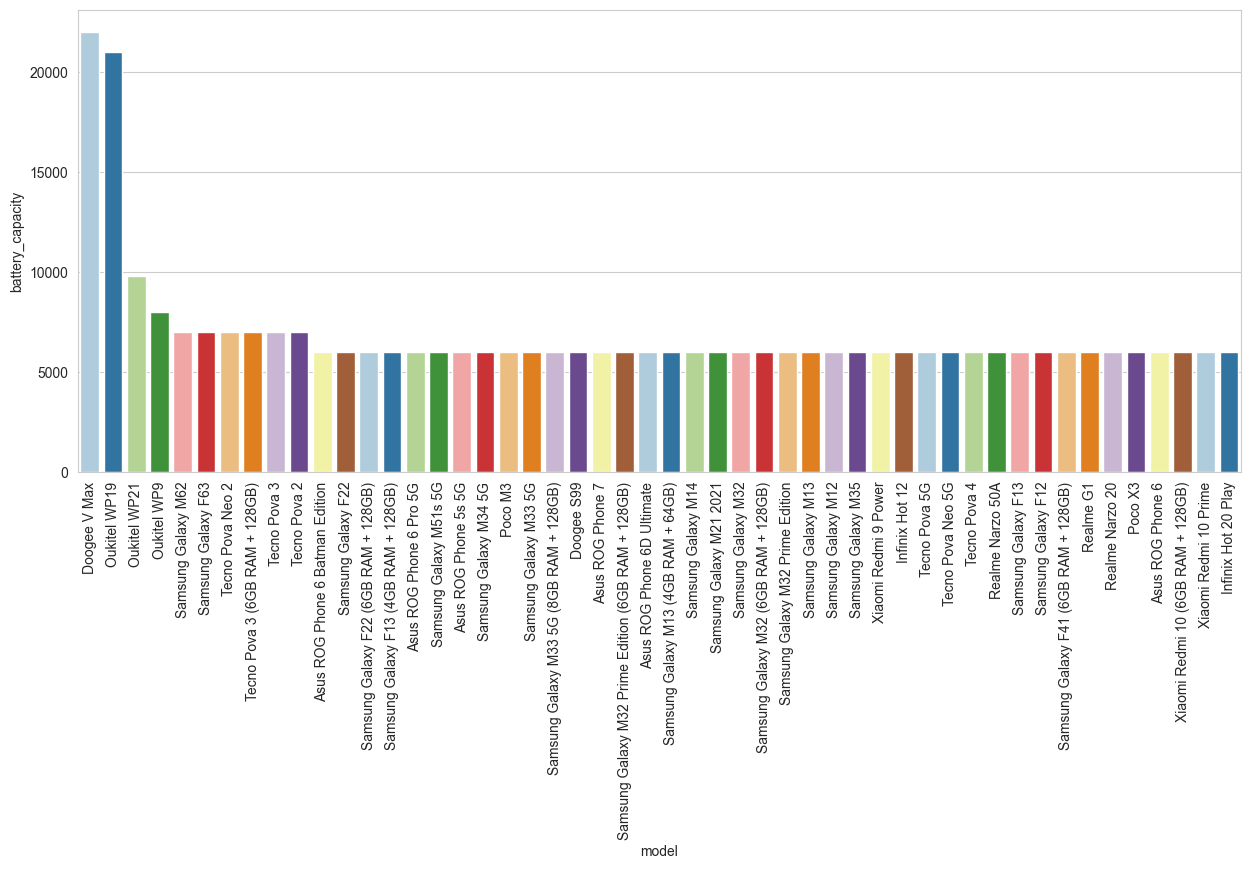

In [343]:
plt.figure(figsize=(15,6))
sns.barplot(data=classifi_battery,x="model",y="battery_capacity",palette="Paired")
plt.xticks(rotation=90)
plt.show()

## Highest Ram Capacity Devices

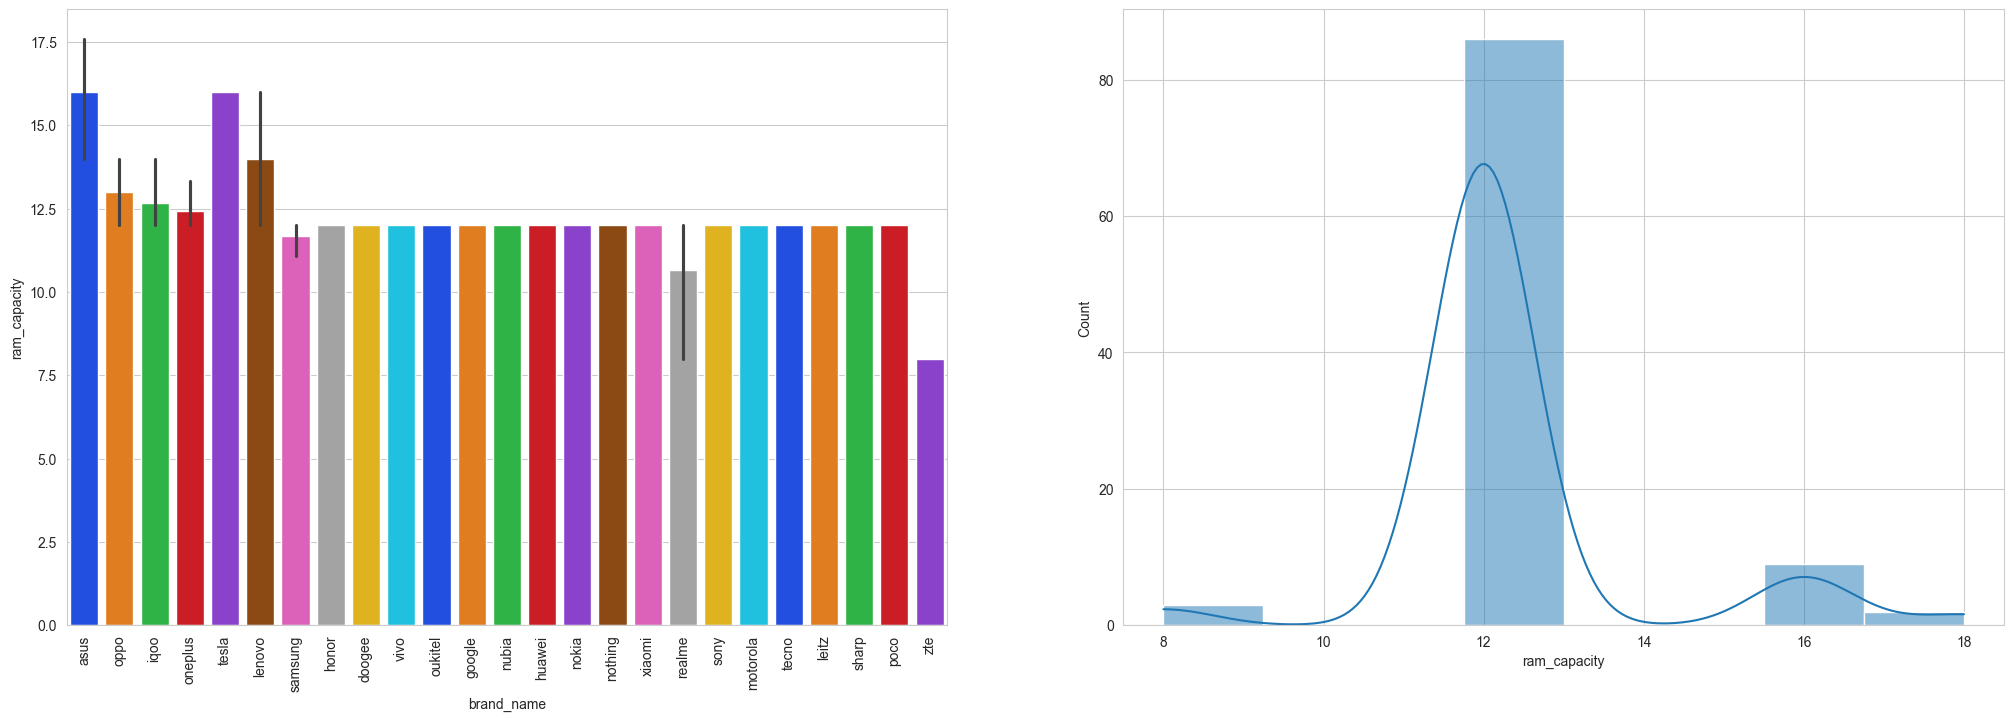

In [374]:
classifi_ram=df.groupby(["brand_name","model","ram_capacity"]).sum().sort_values("ram_capacity",ascending=False).reset_index()
classifi_ram=classifi_ram[["brand_name","model","ram_capacity"]].head(100)
classifi_ram
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.barplot(data=classifi_ram,x="brand_name",y="ram_capacity",palette="bright")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.histplot(data=classifi_ram,x="ram_capacity",kde=True)
plt.show()

In [ ]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12,256,6.70,120,3,1.0,android,50.0,16.0,0,1024
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6,128,6.59,120,3,1.0,android,64.0,16.0,1,1024
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4,64,6.60,90,3,1.0,android,50.0,13.0,1,1024
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6,128,6.55,120,3,1.0,android,50.0,16.0,1,1024
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6,128,6.70,120,3,1.0,android,108.0,16.0,0,1024


## Highest rated devices

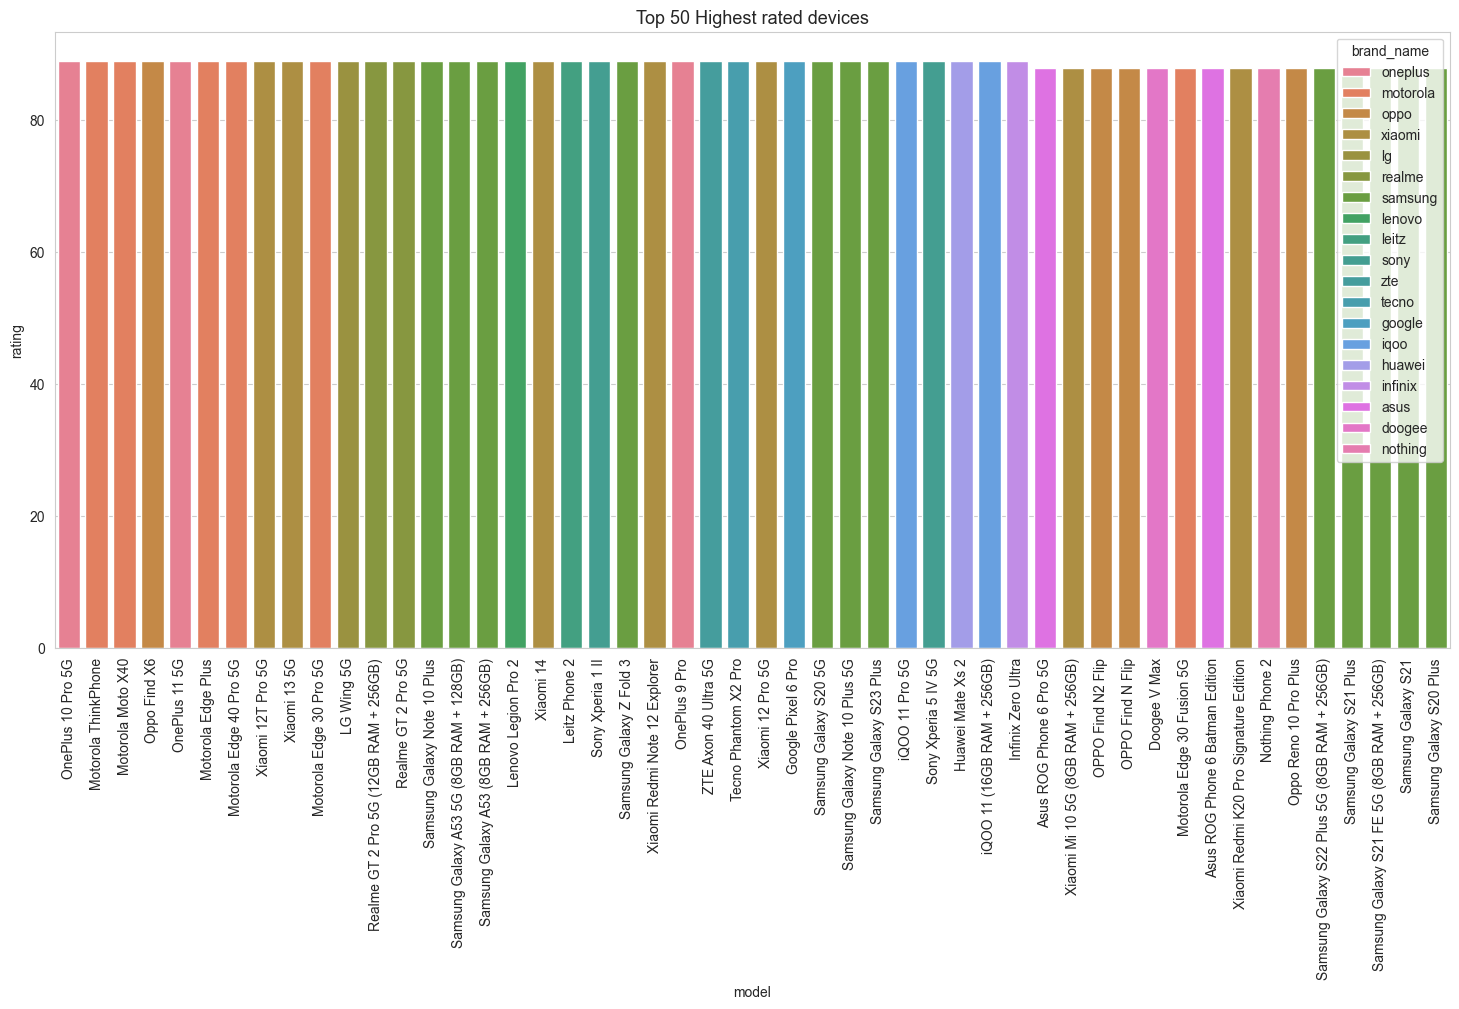

In [406]:
classifi_rat=df.groupby(["brand_name","model","rating"]).sum().sort_values("rating",ascending=False).reset_index()
classifi_ratings=classifi_rat[["brand_name","model","rating"]].head(50)
classifi_ratings
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
sns.barplot(data=classifi_ratings,x="model",y="rating",hue="brand_name")
plt.xticks(rotation=90)
plt.title("Top 50 Highest rated devices",fontsize=13)
plt.show()

 ## Operating System Classification 

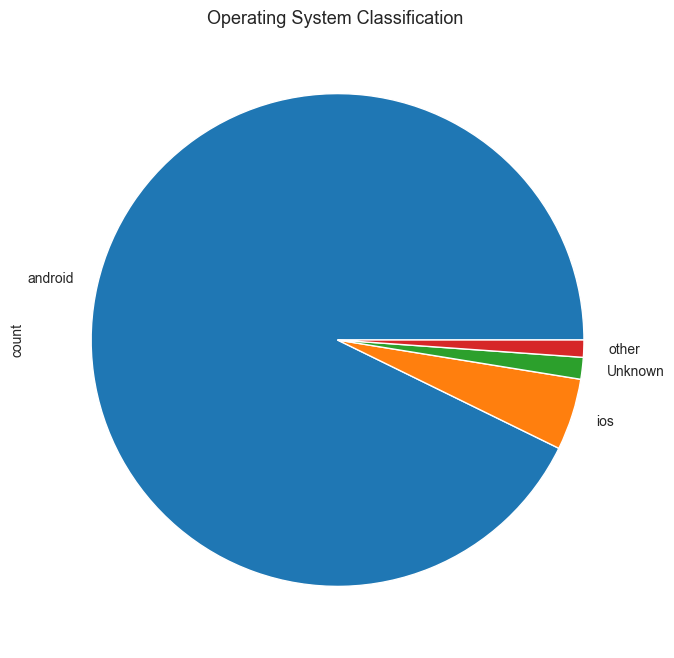

In [412]:
df["os"].value_counts().plot(kind="pie",figsize=(8,8))
plt.title('Operating System Classification ',size=13)
plt.show()

## Correalation Heatmap

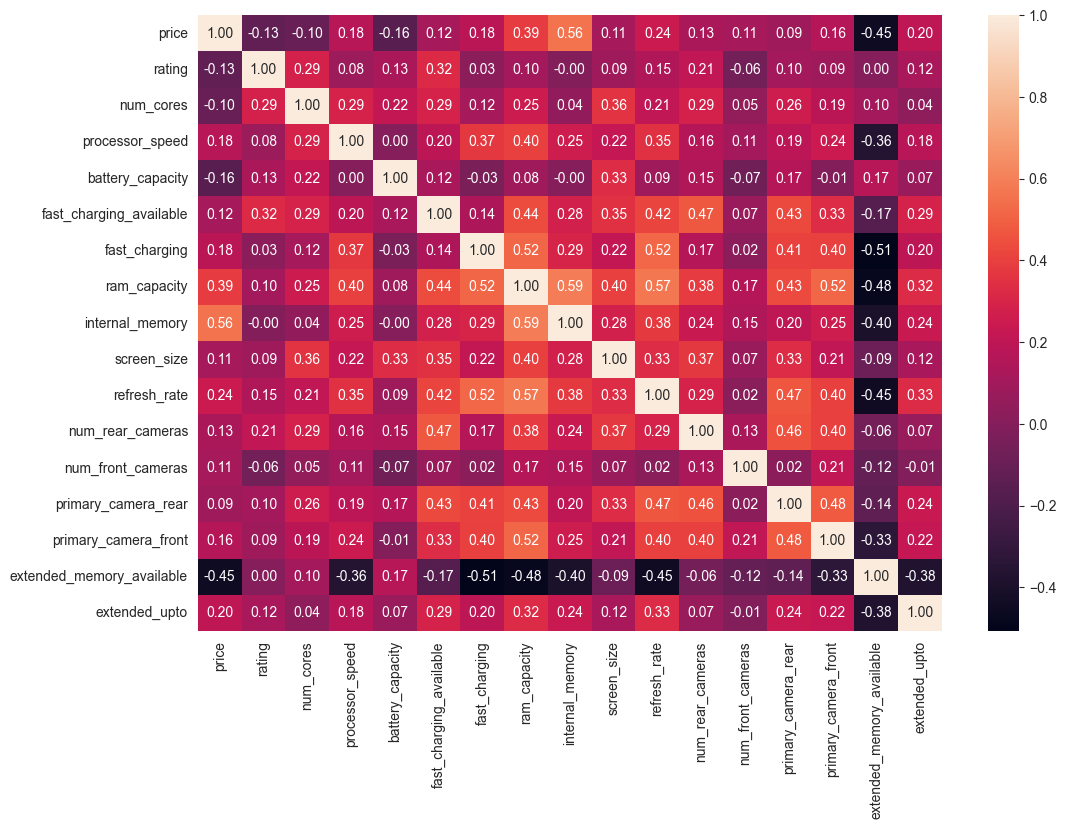

In [383]:
cor=df.select_dtypes(include="number").corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.show()